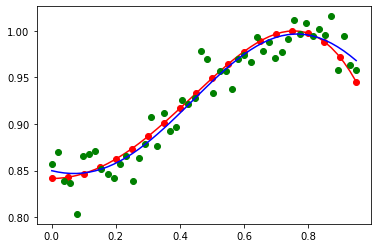

In [2]:
"""
1.&2.&3.Generate data and MLE fitting
"""
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
import math

def actual_distribution():        # generate points using given function
    x = np.arange(0, 1.0, 0.05);  
    y = np.sin(np.power(x, 2) + 1)
    return x, y

def add_noise(y_curve):      # add Guassian random noise;mu = 0, sigma=0.06
    mu = 0
    sigma = 0.02
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

def fitting_true_data(x):  # fit the true data
    y = np.sin(np.power(x, 2) + 1)
    return y
    
def MLE_Basis_function(x, y, M, s):  # MLE_fitting using basis function
    N = len(x)
    fai = np.zeros([N, M])
    mu = [0] * M
    d = 0.4
    for m in range(1, M):
        mu[m] += d * m
        
    for n in range(N):
        fai[n][0] = 1
        
    for n in range(N):
        for m in range(1, M):
            fai[n][m] = math.exp((-(x[n]-mu[m])**2)/(2*s**2))
    
    tmp = linalg.pinv(np.dot(fai.T, fai))
    tm = np.dot(tmp, fai.T)
    w = np.dot(tm, y)
    return w, fai

def my_MLE_plot(x, fai, w):        # plot the curve of MLE prediction
    N = len(x)
    y = np.dot(fai, w)
    return x, y
    
#= = = = = = = = = = = = = =
# generate true data
x_true, y_true = actual_distribution()

#fit on the actual data
x_curve = np.linspace(x_true[0], x_true[-1], 50) #50 points
y_curve = fitting_true_data(x_curve)

# add noise on the true data
y_noise = add_noise(y_curve)
x_noise = x_curve

# fit noisy data using MLE employs basis function
w, fai = MLE_Basis_function(x_noise, y_noise, M=4, s=0.5) # M=4
[x_est, y_est] = my_MLE_plot(x_curve, fai, w)

# show the plot
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue')
plt.show()
plt.show()

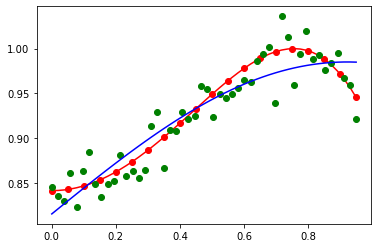

In [16]:
"""
4.Results with different M
"""
# underfitting: M =3
# fit noisy data using MLE employs basis function
w, fai = MLE_Basis_function(x_noise, y_noise, M=3, s=1.0)
[x_est, y_est] = my_MLE_plot(x_curve, fai, w)

# show the plot
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue')
plt.show()
plt.show()

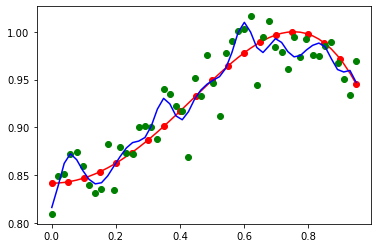

In [17]:
# overfitting: M=20
# fit noisy data using MLE employs basis function
w, fai = MLE_Basis_function(x_noise, y_noise, M=20, s=0.03)
[x_est, y_est] = my_MLE_plot(x_curve, fai, w)

# show the plot
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue')
plt.show()
plt.show()

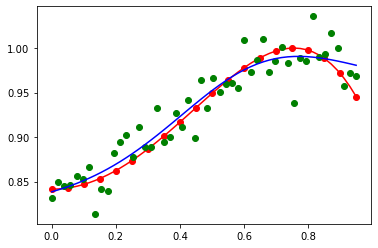

In [4]:
"""
5.Sigmoid basis function and results with different M
"""
# sigmoid function
def MLE_Sigmoid(x, y, M, s):
    N = len(x)
    fai = np.zeros([N, M])
    mu = [0] * M
    d = 1.0/M
    for m in range(1, M):
        mu[m] += d * m
        
    for n in range(N):
        fai[n][0] = 1
        
    for n in range(N):
        for m in range(1, M):
            fai[n][m] = 1.0/(1.0+math.exp((mu[m]-x[n])/s))
    
    tmp = linalg.pinv(np.dot(fai.T, fai))
    tm = np.dot(tmp, fai.T)
    w = np.dot(tm, y)
    return w, fai

#= = = = = = = = = =
# generate true data
x_true, y_true = actual_distribution()

#fit on the actual data
x_curve = np.linspace(x_true[0], x_true[-1], 50) #50 points
y_curve = fitting_true_data(x_curve)

# add noise on the true data
y_noise = add_noise(y_curve)
x_noise = x_curve

# fit noisy data using MLE employs basis function
w, fai = MLE_Sigmoid(x_noise, y_noise, M=4, s=0.2) # M=4
[x_est, y_est] = my_MLE_plot(x_curve, fai, w)

# show the plot
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue')
plt.show()
plt.show()

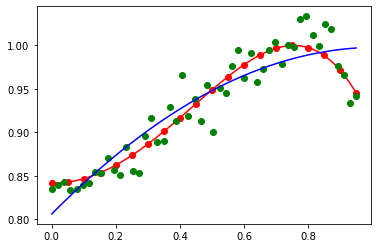

In [19]:
# underfitting: M =3
# fit noisy data using MLE employs basis function
w, fai = MLE_Sigmoid(x_noise, y_noise, M=3, s=2.0)
[x_est, y_est] = my_MLE_plot(x_curve, fai, w)

# show the plot
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue')
plt.show()
plt.show()

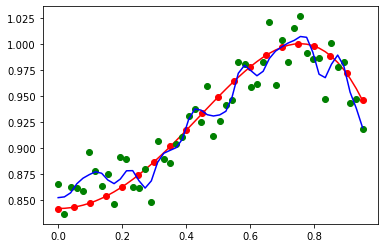

In [62]:
# overfitting: M=20
# fit noisy data using MLE employs basis function
w, fai = MLE_Sigmoid(x_noise, y_noise, M=20, s=0.01)
[x_est, y_est] = my_MLE_plot(x_curve, fai, w)

# show the plot
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue')
plt.show()
plt.show()

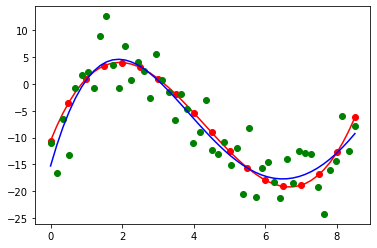

In [5]:
"""
6.change original curve
"""
# changing function
def actual_distribution1():        # generate points using given function
    x = np.arange(0, 9, 0.5);  
    y = 0.4345*np.power(x, 3)-5.607*np.power(x, 2)+16.78*x-10.61
    return x, y

def add_noise1(y_curve):      # add Guassian random noise;mu = 0, sigma=0.06
    mu = 0
    sigma = 4.0
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

def fitting_true_data1(x):  # fit the true data
    y = 0.4345*np.power(x, 3)-5.607*np.power(x, 2)+16.78*x-10.61
    return y

#= = = = = = = = = = = = = =
# generate true data
x_true, y_true = actual_distribution1()

#fit on the actual data
x_curve = np.linspace(x_true[0], x_true[-1], 50) #50 points
y_curve = fitting_true_data1(x_curve)

# add noise on the true data
y_noise = add_noise1(y_curve)
x_noise = x_curve

# fit noisy data using MLE employs basis function
w, fai = MLE_Sigmoid(x_noise, y_noise, M=4, s=5.0)  # M=4
[x_est, y_est] = my_MLE_plot(x_curve, fai, w)

# show the plot
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue')
plt.show()


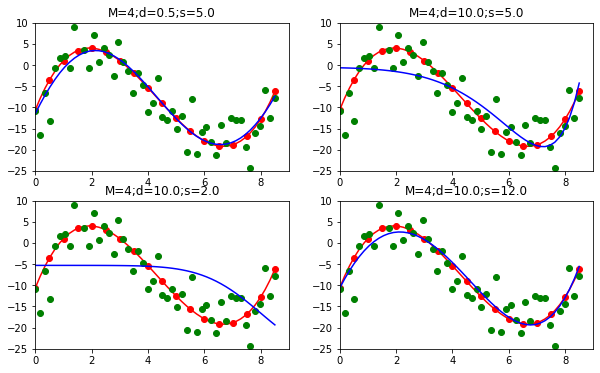

In [47]:
"""
7.Plot basis functions with different parameters
"""
# Gaussian function
def MLE_Basis_function1(x, y, M, d, s):  # MLE_fitting using basis function
    N = len(x)
    fai = np.zeros([N, M])
    mu = [0] * M
    for m in range(1, M):
        mu[m] += d * m
        
    for n in range(N):
        fai[n][0] = 1
        
    for n in range(N):
        for m in range(1, M):
            fai[n][m] = math.exp((-(x[n]-mu[m])**2)/(2*s**2))
    
    tmp = linalg.pinv(np.dot(fai.T, fai))
    tm = np.dot(tmp, fai.T)
    w = np.dot(tm, y)
    return w, fai


# = = == = = = == 
# show the plot
fig = plt.figure(figsize=(10,6))
# M=4;d=0.5;s=5.0
w, fai = MLE_Basis_function1(x_noise, y_noise, M=4, d=0.5, s=5.0)  # M=4
[x_est, y_est] = my_MLE_plot(x_curve, fai, w)
ax1 = fig.add_subplot(2,2,1)
ax1.set_title('M=4;d=0.5;s=5.0')
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue')
plt.xlim(0,9)
plt.ylim(-25, 10)
# M=4;d=10.0;s=5.0
w, fai = MLE_Basis_function1(x_noise, y_noise, M=4, d=10.0, s=5.0)  # M=4
[x_est, y_est] = my_MLE_plot(x_curve, fai, w)
ax2 = fig.add_subplot(2,2,2)
ax2.set_title('M=4;d=10.0;s=5.0')
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue')
plt.xlim(0,9)
plt.ylim(-25, 10)
# M=4;d=10.0;s=2.0
w, fai = MLE_Basis_function1(x_noise, y_noise, M=4, d=10.0, s=2.0)  # M=4
[x_est, y_est] = my_MLE_plot(x_curve, fai, w)
ax3 = fig.add_subplot(2,2,3)
ax3.set_title('M=4;d=10.0;s=2.0')
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue')
plt.xlim(0,9)
plt.ylim(-25, 10)
# M=4;d=10.0;s=12.0
w, fai = MLE_Basis_function1(x_noise, y_noise, M=4, d=10.0, s=12.0)  # M=4
[x_est, y_est] = my_MLE_plot(x_curve, fai, w)
ax4 = fig.add_subplot(2,2,4)
ax4.set_title('M=4;d=10.0;s=12.0')
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue')
plt.xlim(0,9)
plt.ylim(-25, 10)
plt.show()

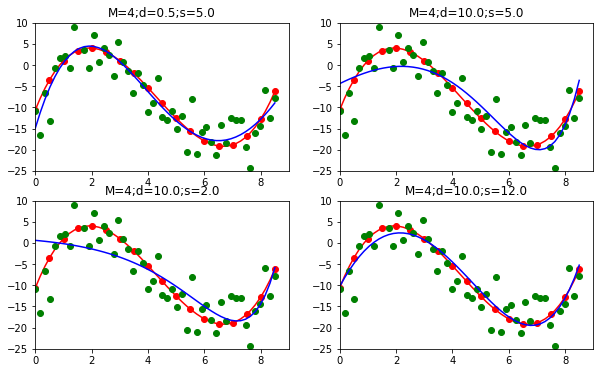

In [53]:
# Sigmoid function
def MLE_Sigmoid1(x, y, M, d, s):
    N = len(x)
    fai = np.zeros([N, M])
    mu = [0] * M
    for m in range(1, M):
        mu[m] += d * m
        
    for n in range(N):
        fai[n][0] = 1
        
    for n in range(N):
        for m in range(1, M):
            fai[n][m] = 1.0/(1.0+math.exp((mu[m]-x[n])/s))
    
    tmp = linalg.pinv(np.dot(fai.T, fai))
    tm = np.dot(tmp, fai.T)
    w = np.dot(tm, y)
    return w, fai
# = = == = = = == 
# show the plot
fig = plt.figure(figsize=(10,6))
# M=4;d=0.5;s=5.0
w, fai = MLE_Sigmoid1(x_noise, y_noise, M=4, d=0.5, s=5.0)  # M=4
[x_est, y_est] = my_MLE_plot(x_curve, fai, w)
ax1 = fig.add_subplot(2,2,1)
ax1.set_title('M=4;d=0.5;s=5.0')
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue')
plt.xlim(0,9)
plt.ylim(-25, 10)
# M=4;d=10.0;s=5.0
w, fai = MLE_Sigmoid1(x_noise, y_noise, M=4, d=10.0, s=5.0)  # M=4
[x_est, y_est] = my_MLE_plot(x_curve, fai, w)
ax2 = fig.add_subplot(2,2,2)
ax2.set_title('M=4;d=10.0;s=5.0')
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue')
plt.xlim(0,9)
plt.ylim(-25, 10)
# M=4;d=10.0;s=2.0
w, fai = MLE_Sigmoid1(x_noise, y_noise, M=4, d=10.0, s=2.0)  # M=4
[x_est, y_est] = my_MLE_plot(x_curve, fai, w)
ax3 = fig.add_subplot(2,2,3)
ax3.set_title('M=4;d=10.0;s=2.0')
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue')
plt.xlim(0,9)
plt.ylim(-25, 10)
# M=4;d=10.0;s=12.0
w, fai = MLE_Sigmoid1(x_noise, y_noise, M=4, d=10.0, s=12.0)  # M=4
[x_est, y_est] = my_MLE_plot(x_curve, fai, w)
ax4 = fig.add_subplot(2,2,4)
ax4.set_title('M=4;d=10.0;s=12.0')
plt.plot(x_true, y_true, 'ro')  
plt.plot(x_curve, y_curve, 'red') # original curve
plt.plot(x_noise, y_noise, 'go')  # noisy data
plt.plot(x_est, y_est, 'blue')
plt.xlim(0,9)
plt.ylim(-25, 10)
plt.show()

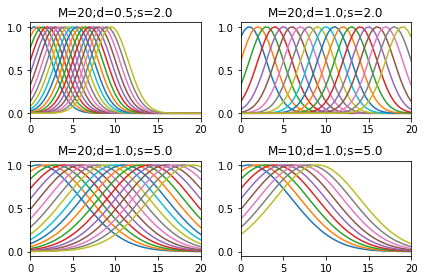

In [221]:
# Guassian function x-axis data range(0, 20)
def plot_Guassian_functions(M, d, s):
    mu = [0] * M
    x = np.linspace(0, 20, 50)
    for m in range(1, M):
        mu[m] += m*d
        y = np.exp(-np.power((x-mu[m]), 2)/(2*s**2))
        plt.plot(x, y)
        plt.xlim(0, 20)
    return
    
# =================
fig = plt.figure()
# M=20;d=0.5;s=2.0
ax1 = fig.add_subplot(2,2,1)
plot_Guassian_functions(M=20, d=0.5, s=2.0)
ax1.set_title('M=20;d=0.5;s=2.0')
#M=20;d=1.0;s=2.0
ax2 = fig.add_subplot(2,2,2)
plot_Guassian_functions(M=20, d=1.0, s=2.0)
ax2.set_title('M=20;d=1.0;s=2.0')
# M=20;d=1.0;s=5.0
ax3 = fig.add_subplot(2,2,3)
plot_Guassian_functions(M=20, d=1.0, s=5.0)
ax3.set_title('M=20;d=1.0;s=5.0')
# M=10;d=1.0;s=5.0
ax4 = fig.add_subplot(2,2,4)
plot_Guassian_functions(M=10, d=1.0, s=5.0)
ax4.set_title('M=10;d=1.0;s=5.0');
fig.tight_layout(h_pad=1)

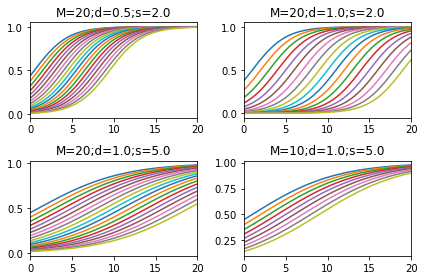

In [223]:
# Sigmoid function x-axis data range(0, 20)
def plot_sigmoid_functions(M, d, s):
    mu = [0] * M
    x = np.linspace(0, 20, 50)
    for m in range(1, M):
        mu[m] += m*d
        y = np.power(1.0+np.exp((mu[m]-x)/s), -1)
        plt.plot(x, y)
        plt.xlim(0, 20)
    return

fig = plt.figure()
# M=20;d=0.5;s=2.0
ax1 = fig.add_subplot(2,2,1)
plot_sigmoid_functions(M=20, d=0.5, s=2.0)
ax1.set_title('M=20;d=0.5;s=2.0')
#M=20;d=1.0;s=2.0
ax2 = fig.add_subplot(2,2,2)
plot_sigmoid_functions(M=20, d=1.0, s=2.0)
ax2.set_title('M=20;d=1.0;s=2.0')
# M=20;d=1.0;s=5.0
ax3 = fig.add_subplot(2,2,3)
plot_sigmoid_functions(M=20, d=1.0, s=5.0)
ax3.set_title('M=20;d=1.0;s=5.0')
# M=10;d=1.0;s=5.0
ax4 = fig.add_subplot(2,2,4)
plot_sigmoid_functions(M=10, d=1.0, s=5.0)
ax4.set_title('M=10;d=1.0;s=5.0');
fig.tight_layout(h_pad=1)

In [ ]:
"""
7. When using polynomial functions, x with high orders would blow up
if x itself is a large number(i.e. x^50 when x=100),however by using
basis functions, y is described by sum of M curves at x, each yi can
be small, so it does not cause any numerical problems.

When using basis functions, it actually change the dimentionality of 
data from D(the origional dimension of samples) to M,which can reduce
the dimensionality, that cannot be reached by polynomial functions.This
also means basis functions make it convenient to process a high dimensionality
of data.
"""